In [39]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from cleaners import GSMArena_Dataset_Cleaner

In [40]:
gsmarena_data = pd.read_csv('C:/Users/alber\Documents/My Personal Projects/Smartphone Project/Files/GSMArena.csv')

cleaner = GSMArena_Dataset_Cleaner(gsmarena_data)

cleaned_gsm_arena_data = cleaner.clean()

c:\Users\alber\Documents\My Personal Projects\Smartphone Project\cleaners.py:116: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone Project\cleaners.py:142: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone Project\cleaners.py:170: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone Project\cleaners.py:171: FutureWarning:

The default value of regex will change from True to False in a future version.

c:\Users\alber\Documents\My Personal Projects\Smartphone Project\cleaners.py:172: FutureWarning:

The default value of regex will change from True to False in a future version.



In [41]:
cleaned_gsm_arena_data.head()

,Brand,Model,Highest_Network_Technology,Announced,Released,Status,Length,Width,Thickness,Weight,...,Colors,Charging_Speed,Wireless_Charging,Reverse_Charging,Loudspeaker_Voice,Loudspeaker_Noise,Loudspeaker_Ring,Battery_Life,IP_Rating,Price
0,ZTE,nubia X 5G,5G,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,...,5,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
1,ZTE,Blade V20,LTE,Not Announced Yet,Not Released Yet,Cancelled,Not Measured,Not Measured,Not Measured,Not Measured,...,2,18,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
2,ZTE,Coral200 Sollar,GSM,2007-05,2007-01,Discontinued,106.0,45.6,18.1,85.0,...,1,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
3,ZTE,F100,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,...,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified
4,ZTE,F101,UMTS,2009-01,2009-01,Discontinued,105.0,46.0,12.6,90.0,...,3,unspecified,unspecified,unspecified,untested,untested,untested,untested,No Resistance,unspecified


In [43]:
cleaned_gsm_arena_data.shape


(11936, 68)

***** Brands *****

In [44]:
cleaned_gsm_arena_data['Brand'].unique().size

119

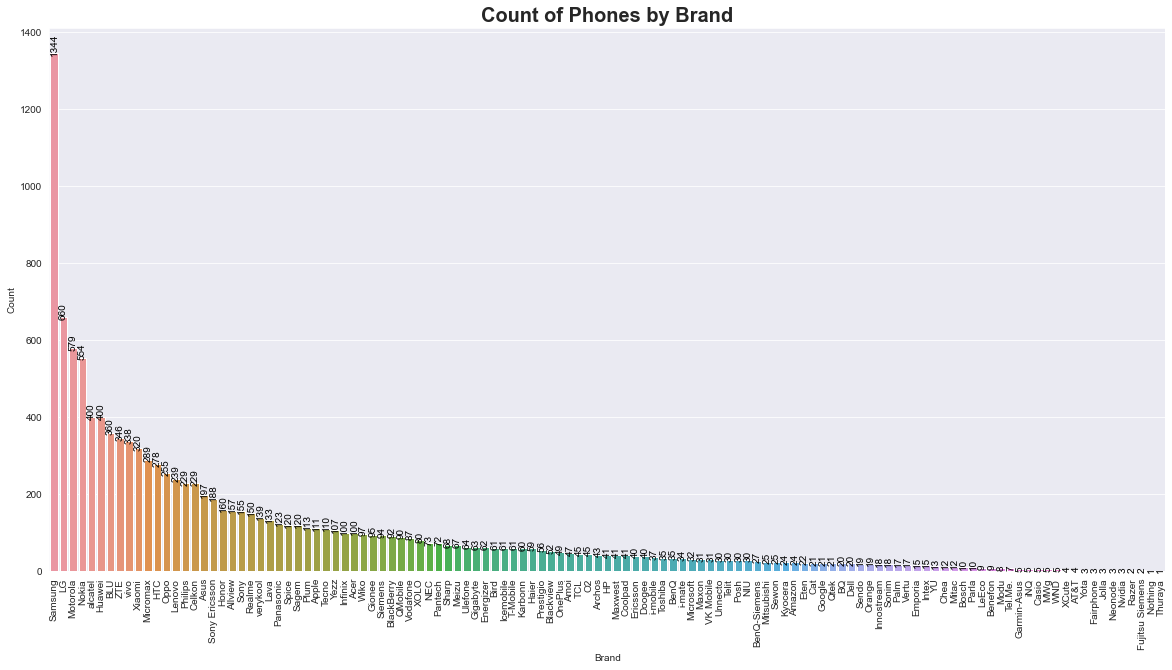

In [53]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values)

# Add actual values on top of each bar
for i, v in enumerate(brand_counts.values):
    plt.text(i, v, str(v), fontsize=10, color='black', ha='center', rotation=90)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Phones by Brand', fontsize=20, weight='bold')

# Show the plot
plt.show()


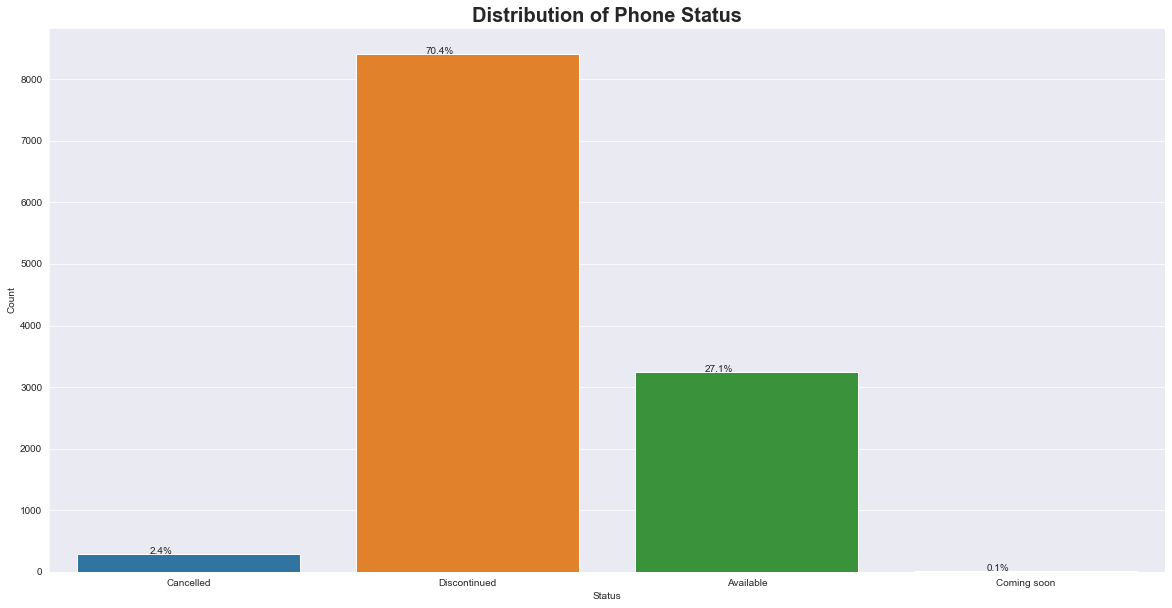

In [54]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Status', data=cleaned_gsm_arena_data)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Phone Status', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Status']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

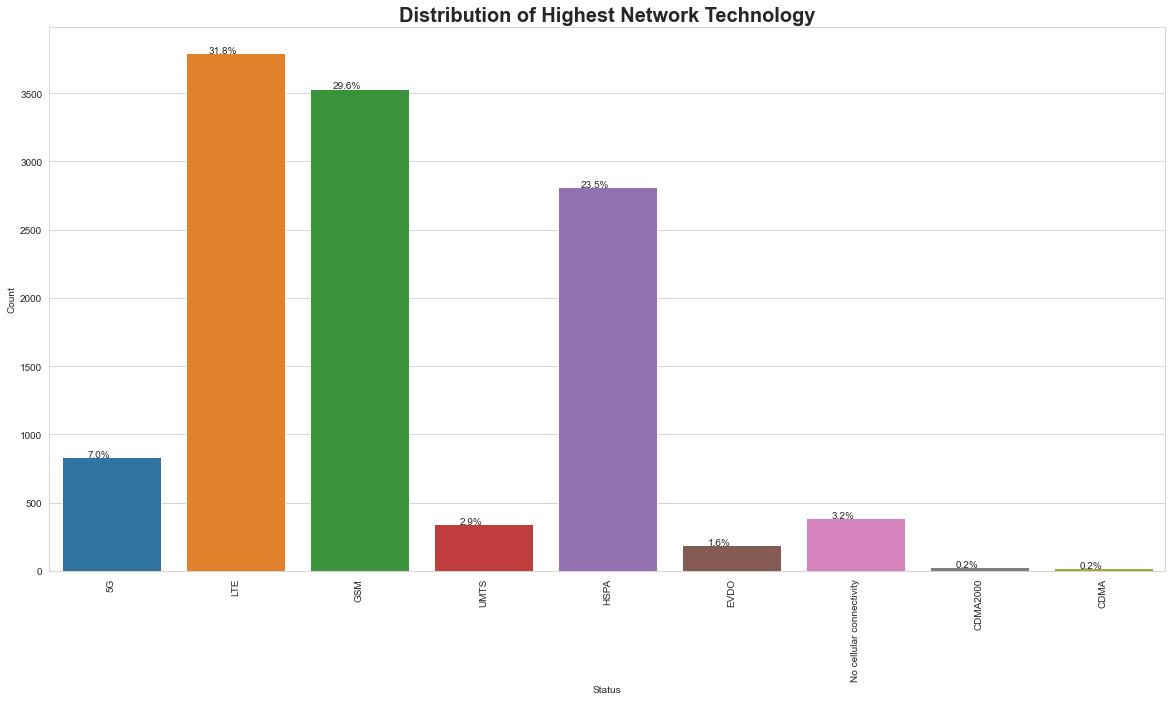

In [52]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Highest_Network_Technology', data=cleaned_gsm_arena_data)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Highest Network Technology', fontsize=20, weight='bold')

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Highest_Network_Technology']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

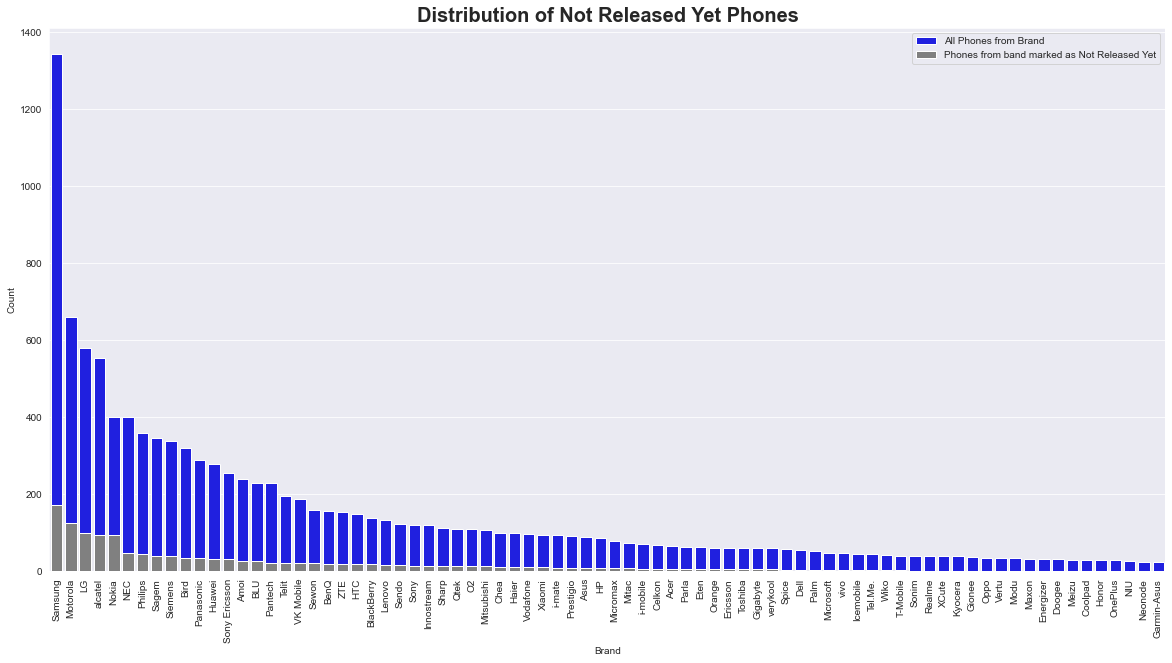

In [48]:
sns.set_style('darkgrid')

# Count the number of occurrences for each value in the 'Brand' column
brand_counts = cleaned_gsm_arena_data['Brand'].value_counts()
not_released_counts = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']=='Not Released Yet']['Brand'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(20, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values, color='blue', label='All Phones from Brand')
sns.barplot(x=not_released_counts.index, y=not_released_counts.values, color='gray', label='Phones from band marked as Not Released Yet')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add labels to the plot
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Distribution of Not Released Yet Phones', fontsize=20, weight='bold')
plt.legend()

# Show the plot
plt.show()


In [49]:
df = cleaned_gsm_arena_data[cleaned_gsm_arena_data['Released']!='Not Released Yet']
df['Release_Year'] = df['Released'].apply(lambda x: x.year)
# group data by 'Brand' and year, and count the number of phones released
phone_counts = df.groupby(['Brand', 'Release_Year']).size()
print(phone_counts)

Brand  Release_Year
AT&T   2006             1
       2007             2
       2008             1
Acer   2009            10
       2010             8
                       ..
vivo   2018            31
       2019            47
       2020            49
       2021            76
       2022            83
Length: 907, dtype: int64


C:\Users\alber\AppData\Local\Temp\ipykernel_11916\785385047.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
import plotly.express as px

# Get the phone counts by brand and release year
phone_counts = df.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create the line plot
fig = px.line(phone_counts, x='Release_Year', y='count', color='Brand')

# Set the x-axis label
fig.update_xaxes(title_text='Release Year')

# Set the y-axis label
fig.update_yaxes(title_text='Count')

# Set the plot title
fig.update_layout(title='Number of Phones Released by Brand each Year between 1994 and 2022')



# Set the maximum value of the x-axis to 2022
fig.update_layout(xaxis=dict(range=[df['Release_Year'].min(), 2022]))

# Remove the legend
fig.update_layout(showlegend=False, height=600, width=1200)

# Show the plot
fig.show()


In [57]:
import ipywidgets as widgets
from ipywidgets import interact

# Get the phone counts by brand and release year
phone_counts = df.groupby(['Brand', 'Release_Year']).size().reset_index(name='count')

# Create a list of all the available brands
brands = phone_counts['Brand'].unique().tolist()

# Define a function to update the plot based on the selected brand
def update_plot(brands):
    # Filter the phone counts by the selected brands
    brand_counts = phone_counts[phone_counts['Brand'].isin(brands)]
    
    # Set the size of the figure
    plt.figure(figsize=(20,10))

    # Create the line plot
    sns.set_style('whitegrid')
    g = sns.lineplot(x='Release_Year', y='count', hue='Brand', data=brand_counts)

    # Set the x-axis label and ticks
    g.set(xlabel='Release Year')
    g.set(ylabel='Count')
    g.set(title=f'Number of Phones Released by {", ".join(brands)} each Year')
    g.set_xticks(range(2010, 2023))

    # Show the plot
    plt.show()

# Create the interactive widget
interact(update_plot, brands=widgets.SelectMultiple(options=brands, value=[brands[0]], description='Brand:'));


interactive(children=(SelectMultiple(description='Brand:', index=(0,), options=('AT&T', 'Acer', 'Allview', 'Am…

In [58]:
cleaned_gsm_arena_data.columns

Index(['Brand', 'Model', 'Highest_Network_Technology', 'Announced', 'Released',
       'Status', 'Length', 'Width', 'Thickness', 'Weight', 'Front', 'Back',
       'Frame', 'Number_of_SIMs', 'Type_of_SIM', 'Display_Type',
       'Display_Brightness', 'Display_HDR_Capability', 'Display_Size_(inches)',
       'Screen_To_Body_Ratio_(%)', 'Display_Aspect_Ratio', 'Pixel_Density',
       'Display_Protection', 'Mobile_OS', 'Mobile_OS_Version', 'Chipset_Maker',
       'Fabrication_Process', 'Number_of_CPU_Cores',
       'CPU_Performance_Core_Frequency', 'CPU_Efficiency_Core_Frequency',
       'SD Card Slot', 'ROM', 'RAM', 'Number_of_Rear_Cameras',
       'Storage_Type_Version', 'Storage_Type', 'Highest_Camera_Resolution',
       'HDR', 'Rear_Video_Resolution', 'Rear_Video_Framerate',
       'Number_of_Selfie_Cameras', 'Selfie_Video_Resolution',
       'Selfie_Video_Framerate', 'Headphone_Jack', 'WI-FI', 'Bluetooth', 'NFC',
       'Radio', 'USB_Connector', 'USB_Version', 'Biometric_Sensor',
    

***** Build *****

In [80]:
cleaned_gsm_arena_data[cleaned_gsm_arena_data['Thickness']!= 'Not Measured']['Thickness'].sort_values()

11080     0.0
6943      0.0
11081     0.0
7945      4.7
5079      4.9
         ... 
4062     46.0
4060     46.0
4061     47.0
2755     50.0
4022     75.0
Name: Thickness, Length: 10652, dtype: object

In [90]:
cleaned_gsm_arena_data.loc[7945]

Brand                                 Lenovo
Model                         Yoga Tab 3 Pro
Highest_Network_Technology               LTE
Announced                            2015-12
Released                             2015-12
                                   ...      
Loudspeaker_Noise                   untested
Loudspeaker_Ring                    untested
Battery_Life                        untested
IP_Rating                      No Resistance
Price                                  380.0
Name: 7945, Length: 68, dtype: object

In [81]:
cleaned_gsm_arena_data[cleaned_gsm_arena_data['Thickness']!= 'Not Measured']['Thickness'].sort_values(ascending=False)

4022     75.0
2755     50.0
4061     47.0
4060     46.0
4062     46.0
         ... 
5079      4.9
7945      4.7
11080     0.0
6943      0.0
11081     0.0
Name: Thickness, Length: 10652, dtype: object

In [91]:
cleaned_gsm_arena_data.loc[4022]

Brand                                 Sagem
Model                               MY 3078
Highest_Network_Technology              GSM
Announced                           2002-01
Released                            2002-01
                                  ...      
Loudspeaker_Noise                  untested
Loudspeaker_Ring                   untested
Battery_Life                       untested
IP_Rating                     No Resistance
Price                           unspecified
Name: 4022, Length: 68, dtype: object

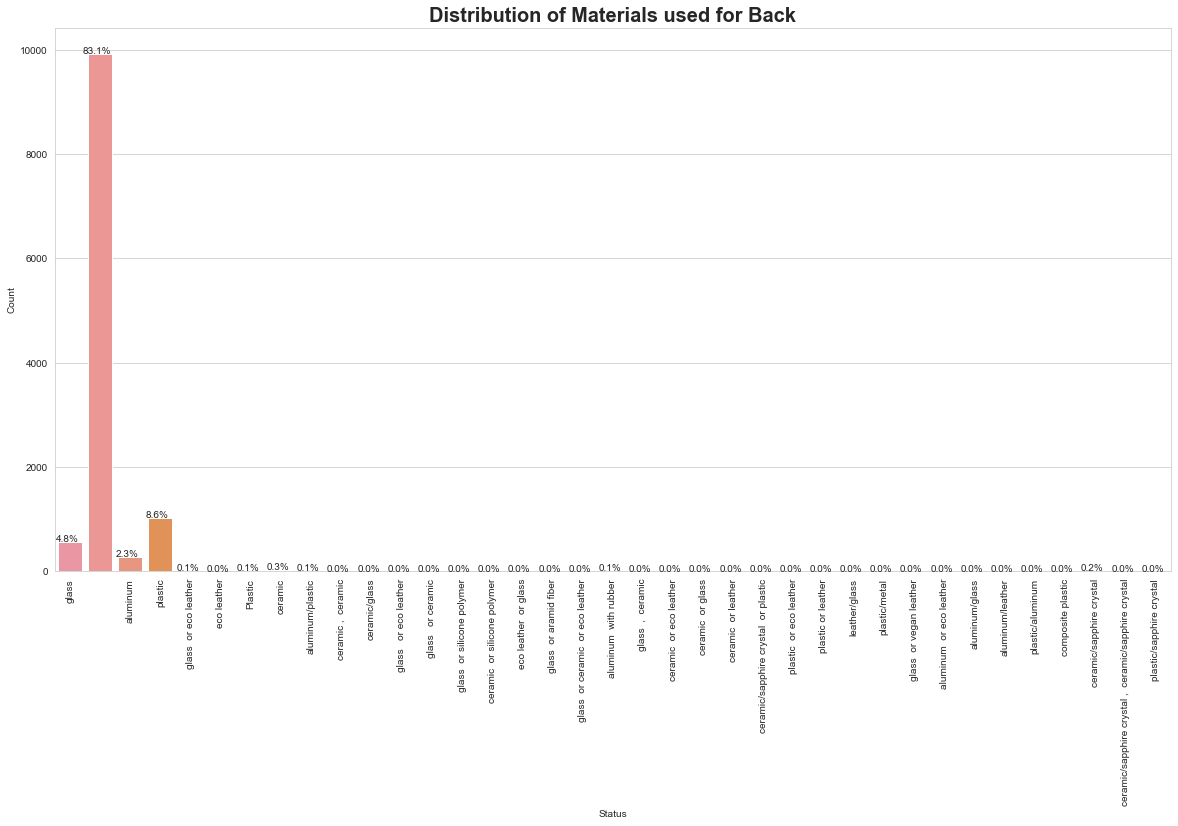

In [94]:
# Create a countplot using seaborn
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Back', data=cleaned_gsm_arena_data)

# Add labels to the plot
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Materials used for Back', fontsize=20, weight='bold')

plt.xticks(rotation=90)

# Add percentages to the plot
total = float(len(cleaned_gsm_arena_data['Back']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 1
    ax.annotate(percentage, (x, y), ha='center', fontsize=10)

# Show the plot
plt.show()

In [97]:
cleaned_gsm_arena_data['Frame'].value_counts()

                                                       9922
plastic                                                1004
aluminum                                                884
stainless steel                                          59
Plastic                                                  17
stainless steel 316L                                     12
titanium                                                  8
ceramic                                                   7
stainless steel  316L                                     5
stainless steel  316L or titanium                         2
18-karat yellow/rose gold                                 2
magnesium alloy                                           2
aluminum/plastic                                          2
aluminum \nGlass front ,  ceramic                         1
titanium alloy                                            1
stainless steel  or aluminum                              1
zinc                                    

In [99]:
cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)'].value_counts()

Not Measured    1767
84.2              56
81.6              53
66.7              53
66.2              49
                ... 
144.2              1
152.6              1
14.0               1
40.6               1
10.6               1
Name: Screen_To_Body_Ratio_(%), Length: 824, dtype: int64

In [101]:
cleaned_gsm_arena_data[cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)']!= 'Not Measured']['Screen_To_Body_Ratio_(%)'].sort_values(ascending=False)

666      180.8
6726     152.6
6725     144.2
1871     110.6
309      102.0
         ...  
6656      10.0
4670       9.9
5457       9.9
11557      9.8
7309       7.6
Name: Screen_To_Body_Ratio_(%), Length: 10169, dtype: object

In [103]:
cleaned_gsm_arena_data.loc[309]

Brand                                    ZTE
Model                         Blade V30 Vita
Highest_Network_Technology               LTE
Announced                            2021-07
Released                             2021-08
                                   ...      
Loudspeaker_Noise                   untested
Loudspeaker_Ring                    untested
Battery_Life                        untested
IP_Rating                      No Resistance
Price                            unspecified
Name: 309, Length: 68, dtype: object

In [110]:
#cleaned_gsm_arena_data[(cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)'] != 'Not Measured') & (cleaned_gsm_arena_data['Screen_To_Body_Ratio_(%)'] <= 100)]['Screen_To_Body_Ratio_(%)'].sort_values(ascending=False)
